In [1]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

#### Carga de datos

In [18]:
x_training = torch.tensor([
    [0,0],
    [1,1],
    [1,0],
    [0,1],
    [2,2],
    [2,1],
    [1,2],
    [3,3],
]).float()

y_training = torch.tensor([ 0,0,0,0,1,1,1,1]).float()

#### Datos de para visualizacion de grilla

In [19]:
# Test grid points
resolution = 15
grid_points = np.zeros((resolution**2,2))
xv, yv = np.meshgrid(np.linspace(0, 3, resolution), np.linspace(0, 3, resolution))
grid_points[:,0] = xv.flatten()
grid_points[:,1] = yv.flatten()
grid_points_torch = torch.tensor(grid_points).float()


### <center> Propagaccion hacia adelante(Forward propagation) </center>

$$ z = \sum_{i=0}^{n} x_{n} * w_{n} + b $$

$$ y = f(z) $$

###  <center> Funcion de costo </center>


$$ loss = (y - \hat{y})^{2} $$

### <center> Gradiente</center>

$$ \frac{d(loss)}{dw_{n}}$$
$$ \frac{d(loss)}{db}$$

### <center>  Actualizacion </center>

$$ w_{n} = w_{n} - lr \frac{d(loss)}{dw_{n}}$$
$$ b = b - lr \frac{d(loss)}{b}$$

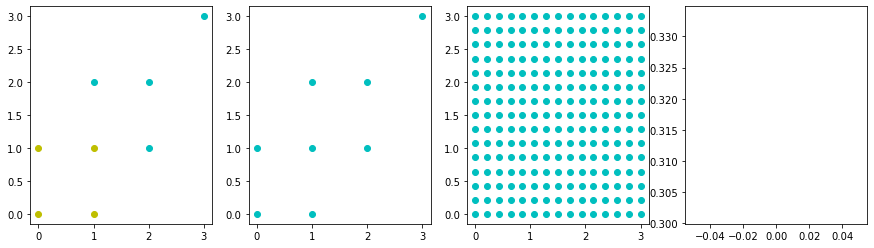

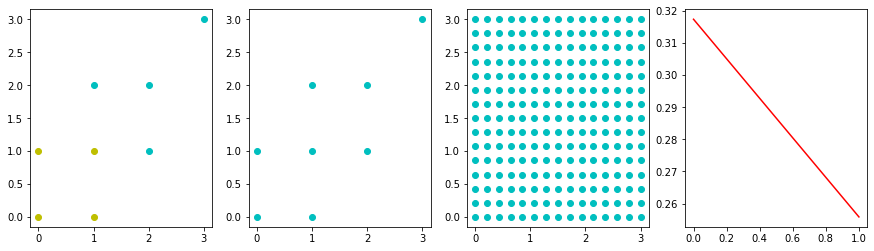

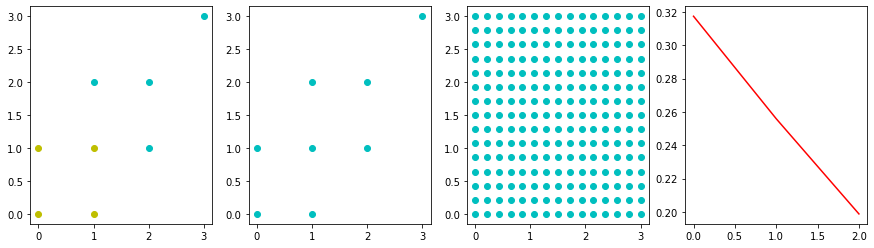

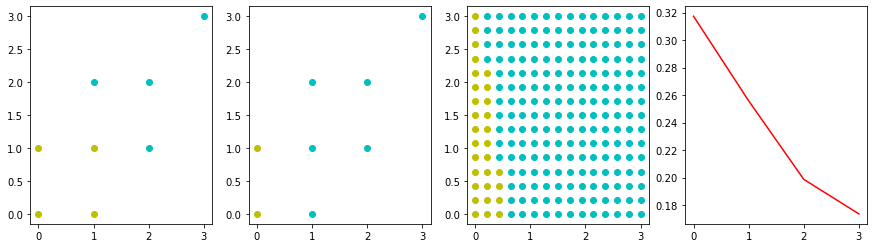

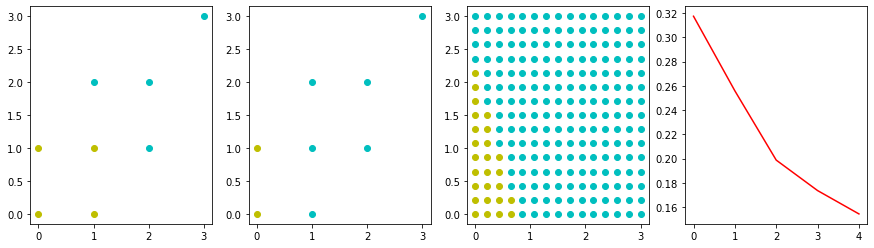

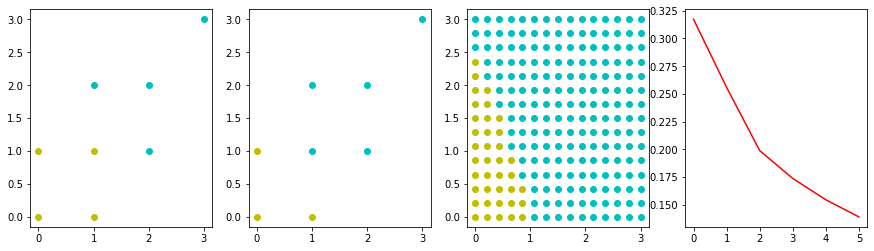

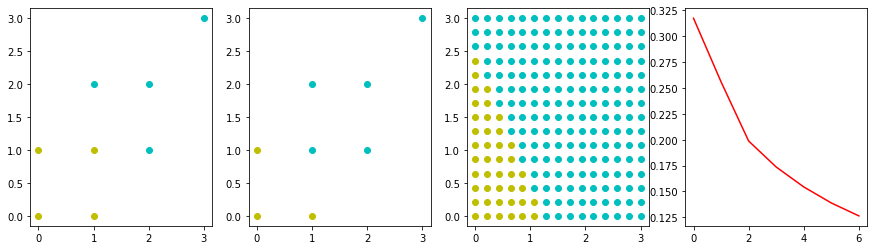

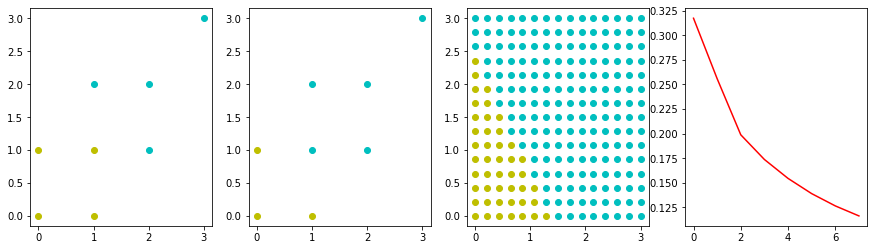

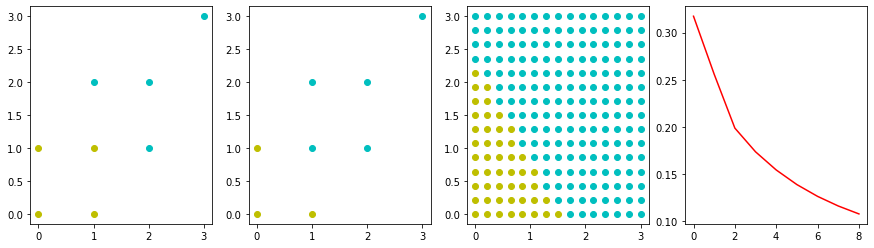

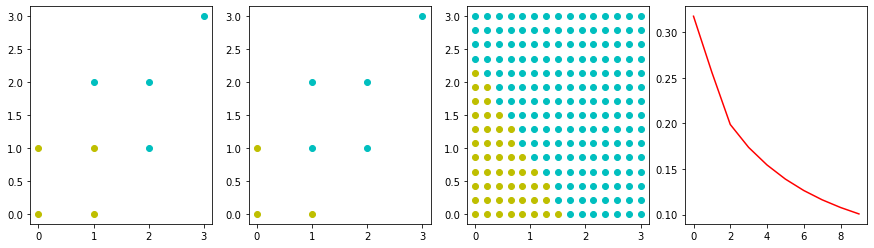

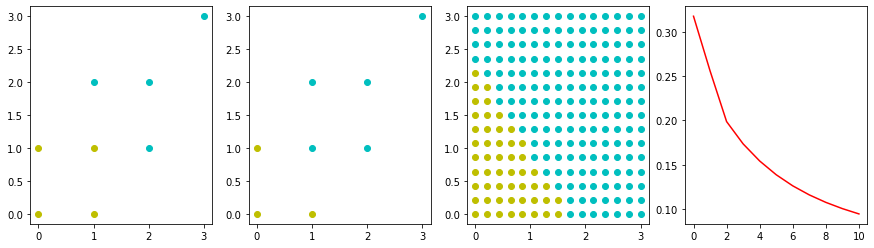

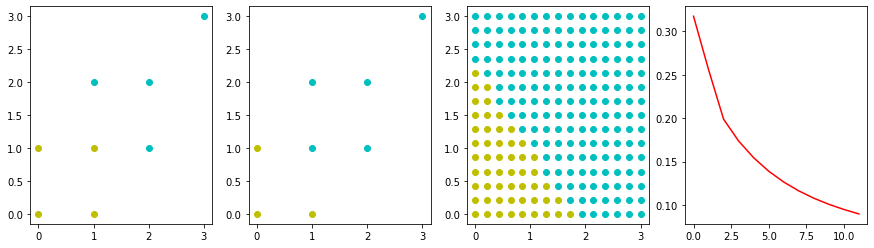

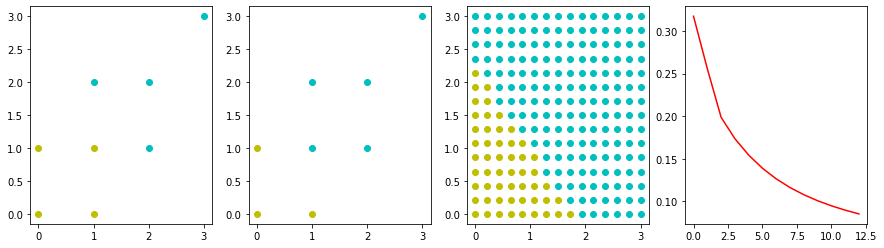

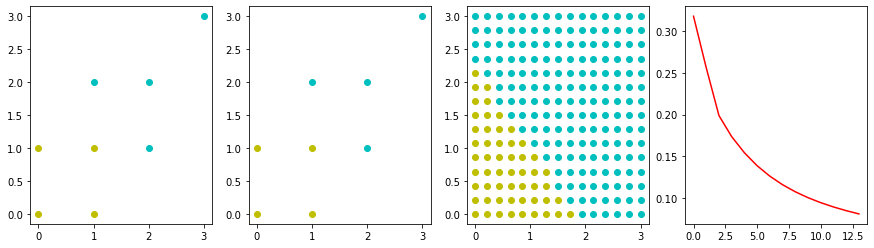

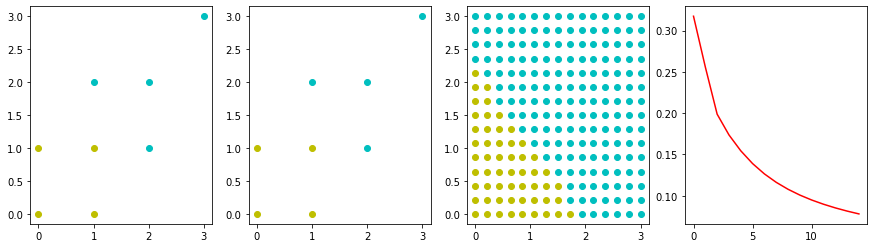

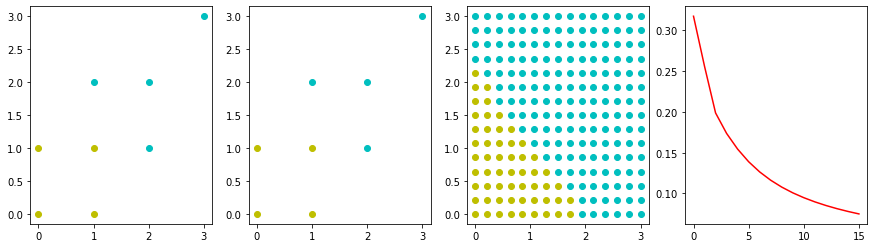

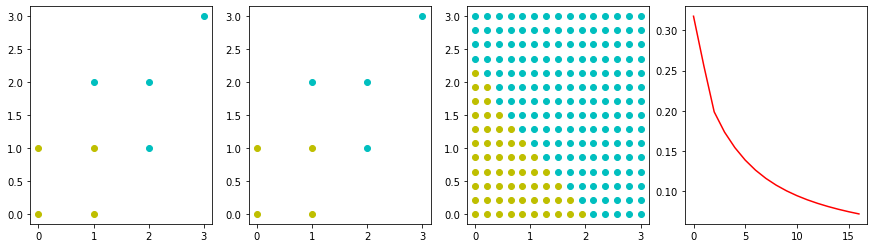

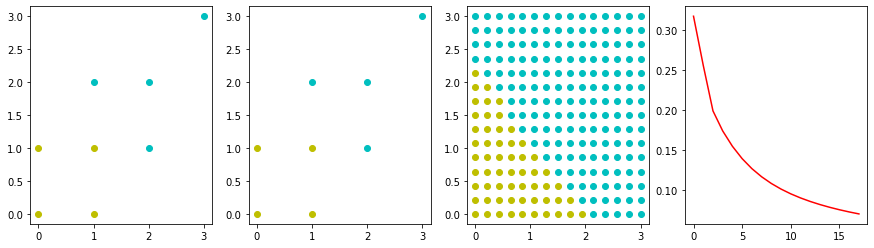

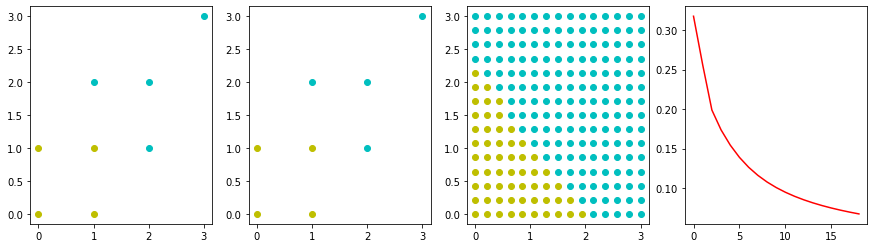

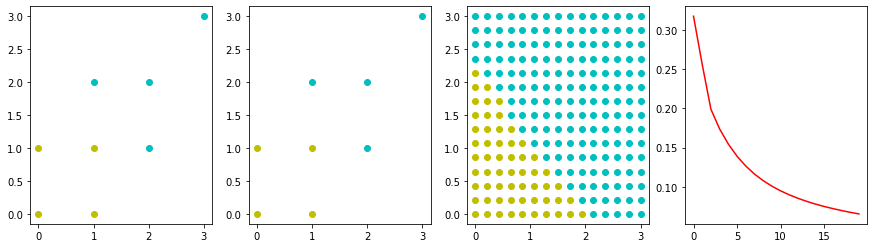

In [23]:
lr = 3
epochs = 20

# Initialize variables
w = torch.rand(2, requires_grad = True)
b = torch.rand(1, requires_grad = True)


loss_hist = []

for i in range(epochs):
    
    
    #Forward propagation
    z = torch.matmul(w,x_training.T) + b
    y = torch.sigmoid(z)
    
    # Funcion de costo
    loss = torch.mean((y  - y_training) ** 2)
    
    loss.backward()
    
    with torch.no_grad():
        
        loss_hist.append(loss.item())
        
        # Plot results
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
        fig.set_figheight(4)
        fig.set_figwidth(15)
        
        ax1.scatter(x_training[:,0][y_training <= 0.5], x_training[:,1][y_training <= 0.5], c="y")
        ax1.scatter(x_training[:,0][y_training >= 0.5], x_training[:,1][y_training >= 0.5], c="c")

        ax2.scatter(x_training[:,0][y <= 0.5], x_training[:,1][y <= 0.5], c="y")
        ax2.scatter(x_training[:,0][y >= 0.5], x_training[:,1][y >= 0.5], c="c")

        z_grid = torch.matmul(w,grid_points_torch.T) + b
        y_grid = torch.sigmoid(z_grid)
        
        ax3.scatter(grid_points[:,0][y_grid <= 0.5], grid_points[:,1][y_grid <= 0.5], c="y")
        ax3.scatter(grid_points[:,0][y_grid >= 0.5], grid_points[:,1][y_grid >= 0.5], c="c")

        ax4.plot(loss_hist,c = "r")
        plt.show()
        
        #Update parameters
        w -= w.grad * lr
        b -= b.grad * lr
    
    w.grad.zero_()
    b.grad.zero_()
    
    